# Anomaly Detection with PyOD

### References

- [Github-Welcome to PyOD documentation!](https://pyod.readthedocs.io/en/latest/)

In [1]:
!pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached numba-0.56.4-cp37-cp37m-macosx_10_14_x86_64.whl (2.4 MB)
  Using cached llvmlite-0.39.1-cp37-cp37m-macosx_10_9_x86_64.whl (25.5 MB)
  Created wheel for pyod: filename=pyod-1.1.3-py3-none-any.whl size=190251 sha256=0f1d0c00453e45e32264323660c9ac4b141f0dd425a4f1d007d1576c99c8d16b
  Stored in directory: /Users/juan/Library/Caches/pip/wheels/69/2c/b6/7d273a923523c4b62d3fd3d1d6cdef369aa4935594276d9316
Successfully built pyod


In [1]:
from __future__ import division
from __future__ import print_function

import os
import sys

# temporary solution for relative imports in case pyod is not installed
# if pyod is installed, no need to use the following line
sys.path.append(
	os.path.abspath(os.path.join(os.path.dirname("__file__"), '..')))

# supress warnings for clean output
import warnings

warnings.filterwarnings("ignore")
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import matplotlib.font_manager

# Import all models
from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
#from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.mcd import MCD
from pyod.models.ocsvm import OCSVM
from pyod.models.pca import PCA
from pyod.models.lscp import LSCP
from pyod.models.inne import INNE
from pyod.models.gmm import GMM
from pyod.models.kde import KDE
from pyod.models.lmdd import LMDD

#from pyod.models.dif import DIF
from pyod.models.copod import COPOD
from pyod.models.ecod import ECOD
#from pyod.models.suod import SUOD
from pyod.models.qmcd import QMCD
from pyod.models.sampling import Sampling
from pyod.models.kpca import KPCA
#from pyod.models.lunar import LUNAR

In [2]:
# Define the number of inliers and outliers
n_samples = 200
outliers_fraction = 0.25
clusters_separation = [0]

In [3]:
# Compare given detectors under given settings
# Initialize the data
xx, yy = np.meshgrid(np.linspace(-7, 7, 100), np.linspace(-7, 7, 100))
n_inliers = int((1. - outliers_fraction) * n_samples)
n_outliers = int(outliers_fraction * n_samples)
ground_truth = np.zeros(n_samples, dtype=int)
ground_truth[-n_outliers:] = 1

# initialize a set of detectors for LSCP
detector_list = [LOF(n_neighbors=5), LOF(n_neighbors=10), LOF(n_neighbors=15),
				 LOF(n_neighbors=20), LOF(n_neighbors=25), LOF(n_neighbors=30),
				 LOF(n_neighbors=35), LOF(n_neighbors=40), LOF(n_neighbors=45),
				 LOF(n_neighbors=50)]

In [4]:
# Show the statics of the data
print('Number of inliers: %i' % n_inliers)
print('Number of outliers: %i' % n_outliers)
print(
	'Ground truth shape is {shape}. Outlier are 1 and inliers are 0.\n'.format(
		shape=ground_truth.shape))
print(ground_truth, '\n')

random_state = 42

Number of inliers: 150
Number of outliers: 50
Ground truth shape is (200,). Outlier are 1 and inliers are 0.

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] 



In [5]:
# Define nine outlier detection tools to be compared
classifiers = {
	'Angle-based Outlier Detector (ABOD)':
		ABOD(contamination=outliers_fraction),
	'K Nearest Neighbors (KNN)': KNN(
		contamination=outliers_fraction),
	'Average KNN': KNN(method='mean',
					   contamination=outliers_fraction),
	'Median KNN': KNN(method='median',
					  contamination=outliers_fraction),
	'Local Outlier Factor (LOF)':
		LOF(n_neighbors=35, contamination=outliers_fraction),

	'Isolation Forest': IForest(contamination=outliers_fraction,
								random_state=random_state),
	#'Deep Isolation Forest (DIF)': DIF(contamination=outliers_fraction,
	#								   random_state=random_state),
	'INNE': INNE(
		max_samples=2, contamination=outliers_fraction,
		random_state=random_state,
	),

	'Locally Selective Combination (LSCP)': LSCP(
		detector_list, contamination=outliers_fraction,
		random_state=random_state),
	#'Feature Bagging':
	#	FeatureBagging(LOF(n_neighbors=35),
	#				   contamination=outliers_fraction,
	#				   random_state=random_state),
	#'SUOD': SUOD(contamination=outliers_fraction),

	'Minimum Covariance Determinant (MCD)': MCD(
		contamination=outliers_fraction, random_state=random_state),

	'Principal Component Analysis (PCA)': PCA(
		contamination=outliers_fraction, random_state=random_state),
	'KPCA': KPCA(
		contamination=outliers_fraction),

	'Probabilistic Mixture Modeling (GMM)': GMM(contamination=outliers_fraction,
												random_state=random_state),

	'LMDD': LMDD(contamination=outliers_fraction,
				 random_state=random_state),

	'Histogram-based Outlier Detection (HBOS)': HBOS(
		contamination=outliers_fraction),

	'Copula-base Outlier Detection (COPOD)': COPOD(
		contamination=outliers_fraction),

	'ECDF-baseD Outlier Detection (ECOD)': ECOD(
		contamination=outliers_fraction),
	'Kernel Density Functions (KDE)': KDE(contamination=outliers_fraction),

	'QMCD': QMCD(
		contamination=outliers_fraction),

	'Sampling': Sampling(
		contamination=outliers_fraction),

	#'LUNAR': LUNAR(),

	'Cluster-based Local Outlier Factor (CBLOF)':
		CBLOF(contamination=outliers_fraction,
			  check_estimator=False, random_state=random_state),

	'One-class SVM (OCSVM)': OCSVM(contamination=outliers_fraction),
}

# Show all detectors
for i, clf in enumerate(classifiers.keys()):
	print('Model', i + 1, clf)

Model 1 Angle-based Outlier Detector (ABOD)
Model 2 K Nearest Neighbors (KNN)
Model 3 Average KNN
Model 4 Median KNN
Model 5 Local Outlier Factor (LOF)
Model 6 Isolation Forest
Model 7 INNE
Model 8 Locally Selective Combination (LSCP)
Model 9 Minimum Covariance Determinant (MCD)
Model 10 Principal Component Analysis (PCA)
Model 11 KPCA
Model 12 Probabilistic Mixture Modeling (GMM)
Model 13 LMDD
Model 14 Histogram-based Outlier Detection (HBOS)
Model 15 Copula-base Outlier Detection (COPOD)
Model 16 ECDF-baseD Outlier Detection (ECOD)
Model 17 Kernel Density Functions (KDE)
Model 18 QMCD
Model 19 Sampling
Model 20 Cluster-based Local Outlier Factor (CBLOF)
Model 21 One-class SVM (OCSVM)



1 fitting Angle-based Outlier Detector (ABOD)

2 fitting K Nearest Neighbors (KNN)

3 fitting Average KNN

4 fitting Median KNN

5 fitting Local Outlier Factor (LOF)

6 fitting Isolation Forest

7 fitting INNE

8 fitting Locally Selective Combination (LSCP)

9 fitting Minimum Covariance Determinant (MCD)

10 fitting Principal Component Analysis (PCA)

11 fitting KPCA

12 fitting Probabilistic Mixture Modeling (GMM)

13 fitting LMDD

14 fitting Histogram-based Outlier Detection (HBOS)

15 fitting Copula-base Outlier Detection (COPOD)

16 fitting ECDF-baseD Outlier Detection (ECOD)

17 fitting Kernel Density Functions (KDE)

18 fitting QMCD


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.



19 fitting Sampling

20 fitting Cluster-based Local Outlier Factor (CBLOF)

21 fitting One-class SVM (OCSVM)


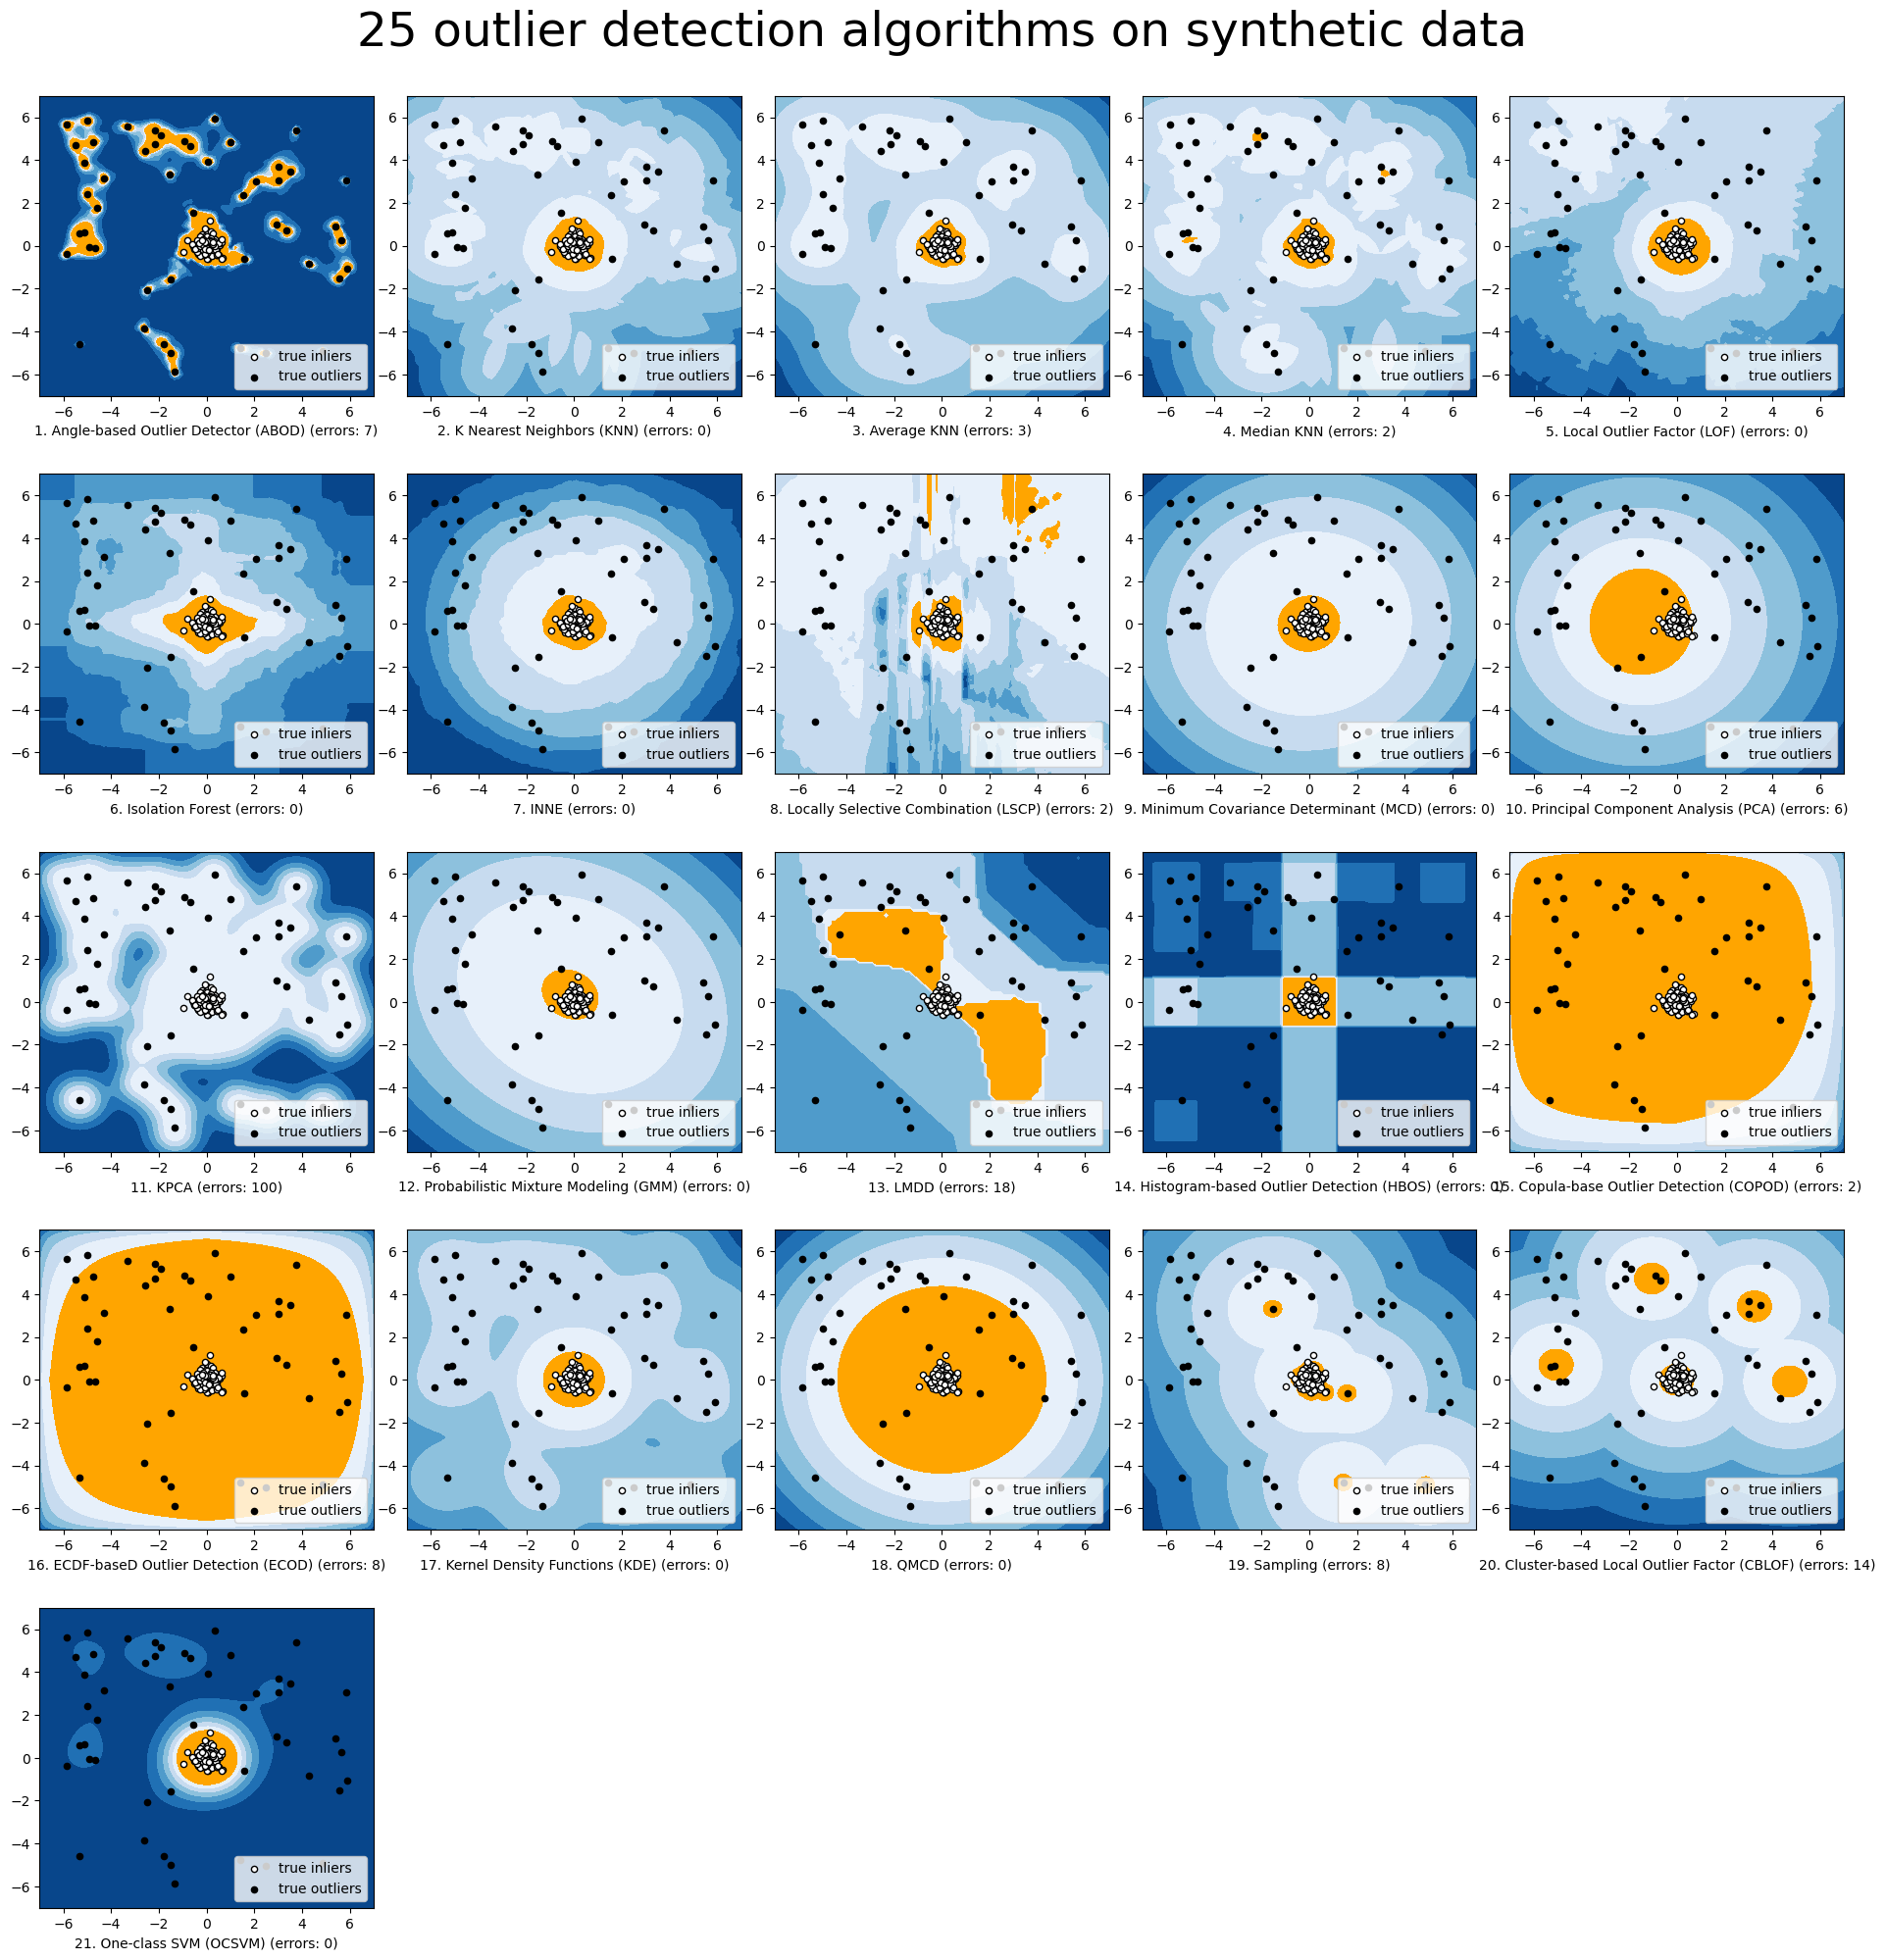

In [6]:
# Fit the models with the generated data and
# compare model performances
for i, offset in enumerate(clusters_separation):
	np.random.seed(42)
	# Data generation
	X1 = 0.3 * np.random.randn(n_inliers // 2, 2) - offset
	X2 = 0.3 * np.random.randn(n_inliers // 2, 2) + offset
	X = np.r_[X1, X2]
	# Add outliers
	X = np.r_[X, np.random.uniform(low=-6, high=6, size=(n_outliers, 2))]

	# Fit the model
	plt.figure(figsize=(20, 22))
	for i, (clf_name, clf) in enumerate(classifiers.items()):
		print()
		print(i + 1, 'fitting', clf_name)
		# fit the data and tag outliers
		clf.fit(X)
		scores_pred = clf.decision_function(X) * -1
		y_pred = clf.predict(X)
		threshold = percentile(scores_pred, 100 * outliers_fraction)
		n_errors = (y_pred != ground_truth).sum()
		# plot the levels lines and the points

		Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
		Z = Z.reshape(xx.shape)
		subplot = plt.subplot(5, 5, i + 1)
		subplot.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),
						 cmap=plt.cm.Blues_r)
		# a = subplot.contour(xx, yy, Z, levels=[threshold],
		#                     linewidths=2, colors='red')
		subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],
						 colors='orange')
		b = subplot.scatter(X[:-n_outliers, 0], X[:-n_outliers, 1], c='white',
							s=20, edgecolor='k')
		c = subplot.scatter(X[-n_outliers:, 0], X[-n_outliers:, 1], c='black',
							s=20, edgecolor='k')
		subplot.axis('tight')
		subplot.legend(
			[
				# a.collections[0],
				b, c],
			[
				# 'learned decision function',
				'true inliers', 'true outliers'],
			prop=matplotlib.font_manager.FontProperties(size=10),
			loc='lower right')
		subplot.set_xlabel("%d. %s (errors: %d)" % (i + 1, clf_name, n_errors))
		subplot.set_xlim((-7, 7))
		subplot.set_ylim((-7, 7))
	plt.subplots_adjust(0.04, 0.1, 0.96, 0.94, 0.1, 0.26)
	plt.suptitle("25 outlier detection algorithms on synthetic data",
				 fontsize=35)
plt.savefig('ALL.png', dpi=300, bbox_inches='tight')
plt.show()

## estimate contamination label with sklearn one-class-svm ??

In [20]:
from sklearn.svm import OneClassSVM
clf = OneClassSVM(gamma='auto').fit(X)
a_prediction = clf.predict(X)
a_scores = clf.score_samples(X)

In [16]:
estimated_outliers_fraction = np.sum(a_prediction==-1) / len(a_prediction)
estimated_outliers_fraction

0.495

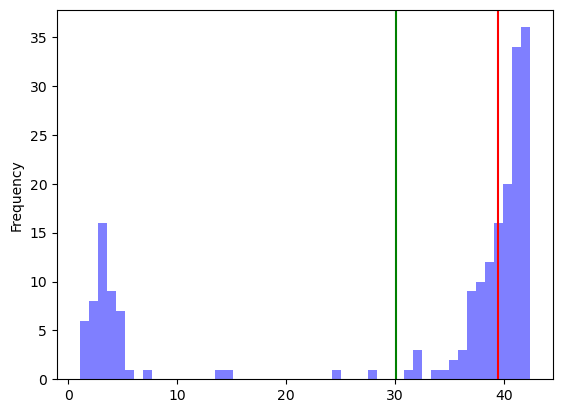

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
_, ax = plt.subplots()
dfa = pd.DataFrame({'anomalous':a_prediction, 'score':a_scores}).sort_values("anomalous")
dfa["score"].plot(kind = 'hist', ax = ax, color="blue", alpha = .5, bins = 50)
t = np.mean([dfa[dfa.anomalous == 1]["score"].min(), dfa[dfa.anomalous == -1]["score"].max()])
my_threshold = np.median(a_scores) - (np.percentile(a_scores, 75) - np.percentile(a_scores, 25)) / 2 # median - (IQR/2)
ax.axvline(t, color = 'red')
ax.axvline(my_threshold, color = 'green')
plt.show()

In [53]:
# estimate new outlier fraction
estimated_modified_outliers_fraction = np.sum(a_scores < my_threshold) / len(X)
estimated_modified_outliers_fraction

0.26

### Conclusion

- El uso de la implementacion de sklearn de One-Class-SVM no requiere el grado de contaminacion del dataset. Este por tanto podria ser usado para estimarlo. No obstante, con los parametros por defecto, no es muy bueno.
- Con la correccion propuesta la exactitud es bastante grande. 
- NO OBSTANTE, este dataset es bastante sencillo. Habria que probar esto con otros datasets. Eso si, podria tener sentido, pues esto formaria parte de lo que es el entrenamiento del propio modelo en base a unos datos propiamente dicho de entrenamiento. El ajustar tanto con el grado de contaminacion afectaria positivamente en la prediccion con datos fuera de los datos de entrenamiento. 